### <font color='darkred'>IA Aplicado a Finanças</font>
### <font color='darkgreen'>Prever inadimplência com base em Análise de Crédito</font>   
### <font color='darkblue'>Parte 1 - Treino e Teste do modelo</font>   

Inadimplência com base no histórico de crédito refere-se à situação em que um indivíduo ou entidade não cumpre suas obrigações financeiras, como o pagamento de uma dívida, e esse comportamento é registrado em seu histórico de crédito.

As instituições financeiras usam o histórico de crédito para prever a probabilidade de inadimplência de um potencial mutuário. Se um indivíduo tem um histórico de inadimplências anteriores, ele é considerado de maior risco

O  objetivo desse projeto é aplicar técnicas de  Inteligência  Artificial  para desenvolver um modelo preditivo focado na identificação precoce de potenciais inadimplentes. 

Com base em características do histórico de crédito da base de clientes de uma empresa, o modelo é treinado para detectar padrões e tendências que tipicamente levam à inadimplência. O objetivo é proporcionar às instituições financeiras uma ferramenta robusta e precisa que as ajude a tomar decisões mais informadas no processo de concessão de crédito, minimizando riscos e fortalecendo a saúde financeira da empresa. 

Ao  longo  do  projeto,  também  enfatizamos  a  importância  da  interpretabilidade  do modelo, garantindo que as decisões tomadas pela IA possam ser compreendidas e justificadas perante as partes interessadas. Os dados usados no projeto são fictícios

### <font color='darkred'>Instalando e Carregando Pacotes</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [3]:
#!pip install torch

     -------------------------------------- 203.0/203.0 MB 2.1 MB/s eta 0:00:00
  Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
     ---------------------------------------- 6.2/6.2 MB 3.7 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
  Attempting uninstall: sympy
    Found existing installation: sympy 1.10.1
    Uninstalling sympy-1.10.1:
      Successfully uninstalled sympy-1.10.1


In [4]:
# Imports
import pandas as pd
import torch # framework para criar o modelo com pytorch para redes neurais artificiais
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split #divide dados em treino e teste
from sklearn.preprocessing import StandardScaler #padroniza os dados
from joblib import dump # para fazer o dump do padronizador (o Scaler) - salvar em disco

# Quando você ajusta o StandardScaler nos dados, ele aprende a média e o desvio padrão de cada feature. 
# Salvando esse objeto ajustado, você pode reutilizar exatamente as mesmas configurações para padronizar novos dados 
# (como dados de teste ou novos dados de produção), garantindo consistência no pré-processamento.

O PyTorch (ou simplesmente torch no Python) é uma biblioteca de código aberto para aprendizado de máquina, amplamente usada para construir e treinar redes neurais e realizar tarefas de aprendizado profundo (deep learning). Criado pelo Facebook (agora Meta), ele é especialmente popular na comunidade de pesquisa em inteligência artificial e aprendizado profundo devido à sua flexibilidade e facilidade de uso.

**Principais Características do PyTorch**

Tensores: PyTorch trabalha com tensores, que são essencialmente arrays multidimensionais (como as matrizes do NumPy) e formam a base de qualquer cálculo em aprendizado profundo. Tensores podem ser processados tanto na CPU quanto na GPU (se você tiver uma placa gráfica compatível), o que acelera os cálculos e é muito útil para redes neurais profundas.

Autograd (Diferenciação Automática): PyTorch possui uma funcionalidade de autograd, que calcula automaticamente as derivadas durante o treinamento de redes neurais. Isso é fundamental, pois a maioria dos algoritmos de aprendizado profundo usa a retropropagação (backpropagation) para ajustar os pesos dos neurônios, minimizando o erro entre as previsões e os valores reais.

Construção Dinâmica de Redes Neurais: Diferente de outras bibliotecas mais antigas, como o TensorFlow (na versão 1.x), o PyTorch permite definir e modificar redes neurais de forma "dinâmica". Isso significa que você pode construir uma rede neural enquanto executa o código, o que é útil para depurar e experimentar novas ideias.

Modelos Pré-Treinados e Transfer Learning: Embora torch em si seja o núcleo, com a extensão torchvision (para visão computacional), você pode acessar modelos de redes neurais pré-treinados. Esses modelos são ideais para realizar transfer learning, ou seja, ajustar um modelo pré-treinado para uma tarefa específica.

Ampla Adoção e Comunidade Ativa: Devido à sua popularidade, o PyTorch tem uma enorme comunidade e muitos recursos educacionais disponíveis. Isso torna mais fácil encontrar tutoriais, documentação e até bibliotecas adicionais para expandir suas funcionalidades.

**Exemplos de Uso do PyTorch**

- Reconhecimento de Imagens: Redes neurais convolucionais (CNNs) são amplamente usadas em visão computacional para classificar imagens ou detectar objetos. PyTorch facilita a construção dessas redes.


- Processamento de Linguagem Natural (NLP): Com redes como LSTMs e Transformers, o PyTorch é muito usado para análise de texto, como tradução automática, análise de sentimentos e chatbots.


- Séries Temporais e Previsão: Modelos como LSTMs e RNNs no PyTorch são usados para prever séries temporais, como preços de ações ou padrões climáticos.


- Criação de Algoritmos de Recomendação: Redes neurais podem ser treinadas para recomendar produtos com base no histórico do usuário.

**torch.nn:**

- Esse módulo fornece componentes essenciais para construir redes neurais, como camadas (layers) e funções de ativação.
- Ele inclui classes como nn.Linear (para camadas totalmente conectadas), nn.Conv2d (para camadas convolucionais em redes neurais convolucionais) e funções de ativação como nn.ReLU.
- torch.nn é fundamental para definir a estrutura das redes neurais, organizando as camadas e configurando os parâmetros que serão ajustados durante o treinamento.


**torch.optim:**

- Esse módulo fornece algoritmos de otimização, como SGD (Stochastic Gradient Descent), Adam, Adagrad, entre outros.
- Ele permite configurar a forma como os pesos da rede neural são atualizados durante o treinamento, controlando o processo de ajuste para minimizar a função de perda.
- Por exemplo, torch.optim.Adam é um otimizador popular para treinamento de redes neurais devido à sua eficácia em ajustar os pesos de forma eficiente.


**Esses dois módulos são muito usados juntos em aprendizado profundo: torch.nn para construir a estrutura da rede neural e torch.optim para treinar a rede ajustando os pesos.**

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Michelle Bouhid" --iversions

Author: Michelle Bouhid

sklearn : 1.3.0
joblib  : 1.4.2
torch   : 2.5.1
platform: 1.0.8
pandas  : 1.5.3



In [6]:
# Carregar o arquivo CSV
df = pd.read_csv("dados/clientes.csv")

In [7]:
# Separar os dados em treinamento e teste
X = df[['idade', 'salario', 'historico_credito', 'emprestimos_ativos']].values  #variavel de entrada
y = df['inadimplente'].values  #variavel de saida

# poderia prever qtos emprestimos ativos o cliente pode ter no futuro, variavel de saida (Y) seria emprestimos
# teria que usar outro modelo pq nesse a saida é 0 ou 1
# teria q verificar se a variavel X é relevante para prever Y. (feito em outras aulas) 
# temos que usar a tecnica de seleção em variáveis X pra saber se é relevante

In [8]:
# Dividir em dados de treino e teste
# usou 20% pra teste e 80% treino
# o random state é pra produzir o mesmo resultado de aula, na versão final pode remover
# precisa dividir em treino e teste para avaliar o modelo sabendo Y na parte de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
# Pré-processar os dados (normalização)
# Se não padronizar, durante as operações matematicas a variavel/atributo que tem uma escala maior, 
# ganha mais relevancia para previsão da variavel alvo, desequilibrando o modelo

scaler = StandardScaler() #cria o objeto scaler

# pega o objeto scaler e aplica o metodo fit_trnasform nos dados de treino
# metodo fit aprende o padrão nos dados - treina o modelo
# usa o transform para aplicar a padronização no dados
X_train = scaler.fit_transform(X_train) 

# no dados de teste aplica o metodo transform somente
# tem que aplicar o padronizador (scaler) tb nos dados de teste.
#Tudo que aplicar em dados de treino aplica nos dados de teste, menos o metodo fit!

X_test = scaler.transform(X_test)

In [10]:
# Ajustar o tipo e shape dos dados
# pytorch espera receber dados em formato de tensor
# é um estrutura de dados do Pytorch, como dataframe no Pandas opr ex.
# o float tensor para colocar todos os valores como decimal,
# mesmo idade sendo inteiro, pra não ter arredondamento nas operaçoes matematicas, ganha precisão
# unsqueeze tb é uma transformação no shape dos dados pra o Pytorch, porque ele espera receber os dados como tensor 
# mas o tensor vem no formato de lista e o unsqueeze quebra a lista e coloca no shape que o Pytorch quer

# o x_train é uma matriz que é um tensor e o y_train é uma lista de valores 
# não pode entregar com mais de 1 dimensão o unsqueeze deixa a lista com 1 dimensão
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).unsqueeze(1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).unsqueeze(1)

### <font color='darkred'>Construir a arquitetura do modelo de Deep Learning</font>

- Deep Learning Book : 
https://www.deeplearningbook.com.br/

In [11]:
# Construindo  a Arquitetura do modelo de Deep Learning
# Definindo a classe Python que define a arquitetura do modelo - Programação orientada a objetos
# Define a classe ModeloNN herdando de nn.Module, que tem 2 métodos: __init__ e forward


class ModeloNN(nn.Module): #classe mãe: "Module", que pertence ao "nn" do torch. (neural network)

    # Método construtor para inicializar a classe
    def __init__(self, input_dim): #recebe o input_dim de X (entrada) = 4 colunas (dimensão)

        # Chama o construtor da classe pai (nn.Module)
        # inicializando as camadas do nosso modelo
        super(ModeloNN, self).__init__() #Executa o construtor da classe mãe
        
        # Define a primeira camada totalmente conectada (entrada: input_dim, saída: 128)
        # fc - fully conected , nesse caso, camada lineares
        self.fc1 = nn.Linear(input_dim, 128)
        
        # Define a segunda camada totalmente conectada (entrada: 128, saída: 64)
        self.fc2 = nn.Linear(128, 64) #neuronios matemáticos 128, 64
        
        # Define a terceira camada totalmente conectada (entrada: 64, saída: 32)
        self.fc3 = nn.Linear(64, 32)
        
        # Define a quarta camada totalmente conectada (entrada: 32, saída: 1)
        self.fc4 = nn.Linear(32, 1)
        
        # Define a função de ativação Sigmóide
        # converte em saida que podemos interpretar como probabilidade, valor entre 0 e 1
        self.sigmoid = nn.Sigmoid()
        
  # Método forward para propagação para frente da rede
    def forward(self, x):

        # Aplica ReLU após a primeira camada totalmente conectada
        # ReLU fç de ativação, exclui resultados negativos, gera 0
        x = torch.relu(self.fc1(x))
        
        # Aplica ReLU após a segunda camada totalmente conectada
        x = torch.relu(self.fc2(x))
        
        # Aplica ReLU após a terceira camada totalmente conectada
        x = torch.relu(self.fc3(x))
        
        # Aplica Sigmóide após a quarta camada totalmente conectada
        x = self.sigmoid(self.fc4(x))
        
        # Retorna a saída
        return x      
    

In [12]:
# Criar o modelo
# X_train conjunto de dados de entradas recebe shape, que busca nº de linhas (0) e colunas (1)
# temos 4 colunas em X, mas vamos automatizar o codigo
# model é a casca do modelo.
# executa o construtor

model = ModeloNN(X_train.shape[1])

In [14]:
# Definir a função de erro
# BCELoss calcula o erro do modelo de classificação binária
criterion = nn.BCELoss() 

In [15]:
# Definir o otimizador
# vamos otimizar a função de erro, minimizando o errro calculado na função BCELoss
# Usa o  algoritmo back propagation, calcula a derivada

optimizer = optim.Adam(model.parameters(), lr = 0.001) 
# laerning rate - lr - hiperparêmetro pra velocidade de treino

print('\nIniciando o Treinamento...\n')


Iniciando o Treinamento...



Binary Cross Entropy Loss(Perda de Entropia Cruzada Binária) é uma função comumente usada  em  problemas  de  **classificação  binária**  ou  em  situações  em  que  se  deseja  modelar  a probabilidade de um evento ser verdadeiro ou falso.

A BCE é usada para calcular o erro do modelo e o objetivo em Deep Learning é exatamente minimizar a função de erro. Esta é a fórmula da função:

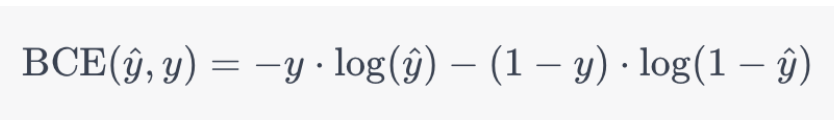

Aqui  y  representa  o  label  real  e  y^  representa  a  previsão  feita  pelo  modelo. A  função nn.BCELoss()  do  PyTorch  calcula  automaticamente  a  média  (ou  a  soma,  dependendo  do argumento  reduction  fornecido)  da  Binary  Cross  Entropy  entre  as  previsões  e  os  rótulos verdadeiros fornecidos.

Confira aqui a documentação oficial da função:https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html


In [16]:
# Treinar o modelo com dados de treino, 100 passadas ou epocas
# A escolha de passadas depende da complexidade e da precisão do modelo
epochs = 100

# Inicia o loop de treinamento para o número especificado de épocas, pelo range de passadas (epochs)
for epoch in range(epochs):

    # Zera os gradientes do otimizador para não acumular entre as épocas
    # os gradientes são mantidos na memória a cada passada e zera em cada passada por causa da memoria
    optimizer.zero_grad()
    
    # Realiza a propagação para frente: calcula as previsões do modelo para os dados de treinamento
    # realiza o back propagation no código de optimizer acima
    # pega os outputs e grava em outputs
    outputs = model(X_train)
    
    # Calcula a perda (erro) usando a função de perda especificada (criterion)
    # pega os outputs e os valores reais de treino (y) e apresentam ao criterion, ela entrega o erro
    loss = criterion(outputs, y_train)
    
    # Realiza a propagação para trás: calcula os gradientes da perda em relação aos parâmetros do modelo
    loss.backward()
    
    # Atualiza os parâmetros do modelo usando o otimizador
    optimizer.step()
    
    # Imprime informações sobre a época atual e a perda
    print(f'Epoch {epoch+1}/{epochs}, Erro em Treino: {loss.item()}')

Epoch 1/100, Erro em Treino: 0.7288562655448914
Epoch 2/100, Erro em Treino: 0.7156071662902832
Epoch 3/100, Erro em Treino: 0.702572226524353
Epoch 4/100, Erro em Treino: 0.6895853281021118
Epoch 5/100, Erro em Treino: 0.6766160726547241
Epoch 6/100, Erro em Treino: 0.6636762022972107
Epoch 7/100, Erro em Treino: 0.6507443785667419
Epoch 8/100, Erro em Treino: 0.6377660632133484
Epoch 9/100, Erro em Treino: 0.6247169375419617
Epoch 10/100, Erro em Treino: 0.6112528443336487
Epoch 11/100, Erro em Treino: 0.5972772836685181
Epoch 12/100, Erro em Treino: 0.5828590989112854
Epoch 13/100, Erro em Treino: 0.5680578947067261
Epoch 14/100, Erro em Treino: 0.5529263615608215
Epoch 15/100, Erro em Treino: 0.5374132394790649
Epoch 16/100, Erro em Treino: 0.5216258764266968
Epoch 17/100, Erro em Treino: 0.5056553483009338
Epoch 18/100, Erro em Treino: 0.4897063076496124
Epoch 19/100, Erro em Treino: 0.47402632236480713
Epoch 20/100, Erro em Treino: 0.45885682106018066
Epoch 21/100, Erro em Treino

In [17]:
# Testar o modelo com dados de teste

# Desativa o cálculo automático de gradientes para melhorar a eficiência durante a inferência
#não precisa mais de gradiente, só precisa pra treinar
with torch.no_grad(): 
    
    # Realiza a propagação para frente no conjunto de teste para obter as previsões do modelo
    test_outputs = model(X_test)
    
    # Calcula a perda (erro) no conjunto de teste usando a função de perda (criterion)
    test_loss = criterion(test_outputs, y_test)


print('\nTreinamento Concluído com Sucesso!\n')

print(f'Erro em Teste: {test_loss.item()}')

print('\nModelos Salvos em Disco!\n')


Treinamento Concluído com Sucesso!

Erro em Teste: 0.24647237360477448

Modelos Salvos em Disco!



In [18]:
# Salvar o scaler
dump(scaler, 'modelos/michelle_scaler.pkl')

# Salvar o modelo
torch.save(model.state_dict(), 'modelos/michelle_modelo.pth')


## Fim


A principal diferença entre o que está sendo feito aqui (classificação binária com a função de erro Binary Cross Entropy Loss ou BCE) e uma regressão linear está no objetivo e na forma como o erro é calculado.

Vamos detalhar essas diferenças:

> 1. Objetivo do Problema

**Classificação Binária (Usando BCE Loss):**
O objetivo é prever a probabilidade de um evento ocorrer (como inadimplência: sim ou não).
A saída é geralmente uma probabilidade entre 0 e 1, onde 1 indica a classe positiva e 0 indica a classe negativa.
Aqui, usamos uma função de ativação sigmoide na última camada, que converte o valor final da rede neural para um valor entre 0 e 1.


**Regressão Linear:**

O objetivo é prever um valor contínuo (por exemplo, preço de uma casa).
A saída não é uma probabilidade, mas sim um número real, que pode assumir qualquer valor contínuo.
A regressão linear não usa a função sigmoide, pois a saída não precisa ser limitada ao intervalo de 0 a 1.


> 2. Função de Erro:
    
Binary Cross Entropy Loss (BCE Loss):

A BCE Loss mede o erro entre a previsão de probabilidade do modelo e o valor real (0 ou 1).

A fórmula da **Binary Cross Entropy Loss** é:

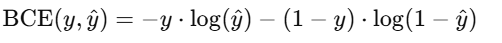

Onde:
-y é o valor verdadeiro (0 ou 1).
- y^ é a previsão do modelo (probabilidade entre 0 e 1).

Essa função é usada em problemas de classificação binária e penaliza o modelo com base em quão longe a 
previsão de probabilidade está do valor real.

Essa fórmula penaliza fortemente previsões que estão longe da probabilidade correta, ou seja, quando o modelo está confiante na classe errada.
É apropriada para problemas onde queremos que a saída seja uma probabilidade, pois a função de ativação sigmoide e a BCE Loss combinam bem para ajustar o modelo para esse fim.


Erro Quadrático Médio (MSE) na Regressão Linear:

A função de erro mais comum em regressão linear é o Mean Squared Error (MSE), que mede a média das diferenças quadradas entre as previsões e os valores reais.

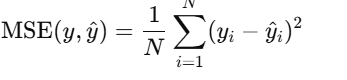

Essa fórmula penaliza previsões que estão longe do valor verdadeiro ao quadrado, o que amplifica os erros maiores.
O MSE é adequado para regressão porque mede o erro em valores contínuos e não se preocupa com probabilidades.

> 3. Saída e Interpretação


**Classificação Binária:**

A saída é uma probabilidade (graças à função sigmoide), e o modelo faz a previsão final comparando essa probabilidade a um limiar (por exemplo, se a probabilidade é maior que 0.5, classifica como 1).


**Regressão Linear:**

A saída é um valor contínuo que o modelo tenta aproximar ao valor real. Não há função sigmoide ou outro tipo de ativação na última camada, pois não estamos tentando limitar o valor.


#### Em Resumo

> Para **classificação binária**, a função Binary Cross Entropy Loss (BCE) mede o erro em prever probabilidades e usa a função sigmoide para produzir uma saída entre 0 e 1.

> Para **regressão linear**, a função Mean Squared Error (MSE) mede o erro em prever valores contínuos e não impõe limite à saída.
A escolha da função de erro e da ativação final é crítica para alinhar o modelo ao objetivo específico, seja classificação ou regressão.

Obs: overfitting o modelo aprende o padrão dos dados, aprender os ruidos, ao inves de aprender a generalização matemática,

Método é uma função dentro de uma classe, aqui nesse NB: class ModeloNN - metodo ModeloNN.

Temos 2 métodos nessa função:

1 - Método construtor __init__ , quando criar um objeto da class (instanciar a classe), tudo que está no construtor será executado para a iniciação do objeto model criado abaixo. Pra iniciar o objeto da classe.
Essas camadas, vão aprendendo os padrões entre os dados

2 - metodo foward - onde o modelo é efetivamente executado

### Programação Orientada a Objetos:

#### 1. Definindo a Classe `ModeloNN`

- `class ModeloNN(nn.Module):`
  - Criamos uma nova classe `ModeloNN` que herda de `nn.Module`. Isso é obrigatório para que a rede neural funcione dentro do PyTorch e possibilita o uso dos métodos e propriedades dessa classe base.

#### 2. Método `__init__` (Construtor da Classe)

- `def __init__(self, input_dim):`
  - Esse é o **método construtor** da classe. Ele é chamado automaticamente quando você cria uma instância do `ModeloNN`.
  - `input_dim` é o número de entradas (ou features) que o modelo vai receber, definido com base nos dados de entrada.
  

- `super(ModeloNN, self).__init__()`
  - Aqui você chama o construtor da classe pai (`nn.Module`). Isso é necessário para inicializar as propriedades do `nn.Module` na sua classe, permitindo o uso de métodos internos do PyTorch.

#### Definindo Camadas da Rede Neural

- `self.fc1 = nn.Linear(input_dim, 128):`
  - Define a primeira camada totalmente conectada (`fc1`). Recebe `input_dim` entradas e gera 128 saídas.

- `self.fc2 = nn.Linear(128, 64):`
  - Define a segunda camada, que recebe as 128 saídas da camada anterior e produz 64 saídas.

- `self.fc3 = nn.Linear(64, 32):`
  - Define a terceira camada, com 64 entradas e 32 saídas.

- `self.fc4 = nn.Linear(32, 1):`
  - Define a última camada com uma única saída (provavelmente para prever uma probabilidade de inadimplência).

- `self.sigmoid = nn.Sigmoid()`
  - A última camada utiliza a função de ativação **sigmoide** para restringir a saída entre 0 e 1, interpretável como uma probabilidade.

#### 3. Método `forward` (Propagação para Frente)

Esse método define como os dados passam pelas camadas da rede neural.

- `x = torch.relu(self.fc1(x))`
  - Passa a entrada `x` pela primeira camada (`fc1`) e aplica a função de ativação **ReLU**. A ReLU transforma valores negativos em zero, introduzindo não linearidade.

- `x = torch.relu(self.fc2(x))`
  - Passa a saída da camada anterior (`fc2`) pela ReLU novamente.

- `x = torch.relu(self.fc3(x))`
  - Aplica ReLU na terceira camada (`fc3`).

- `x = self.sigmoid(self.fc4(x))`
  - Finalmente, passa pela última camada (`fc4`) e aplica a função de ativação sigmoide para gerar a saída entre 0 e 1.

- `return x`
  - Retorna a saída final da rede, que é uma probabilidade de inadimplência no intervalo de 0 a 1.


